🌟 Exercise 1: Duplicate Detection and Removal


In [1]:
import pandas as pd

# Charger le dataset Titanic
df = pd.read_csv("train.csv")  # Assurez-vous que le fichier train.csv est dans le même dossier

# Afficher les 5 premières lignes pour avoir un aperçu
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Identified duplicate lines
duplicates = df.duplicated()

# Duplicates display (if any)
print(f"Number of duplicated lines: {duplicates.sum()}")

print(df[duplicates])

Number of duplicated lines: 0
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [ ]:
# Dimensions before removal
print(f"Number of lines before removal: {df.shape[0]}")

# Duplicates removal
df_cleaned = df.drop_duplicates()

# Dimensions after removal
print(f"Number of lines after removal: {df_cleaned.shape[0]}")

Number of lines before removal : 891
Number of lines after removal : 891


In [6]:
# Checking of possible remaining duplicates
remaining_duplicates = df_cleaned.duplicated().sum()
print(f"Nomber of remaining duplicates: {remaining_duplicates}")

Nomber of remaining duplicates: 0


🌟 Exercise 2: Handling Missing Values

In [7]:
import pandas as pd

df = pd.read_csv("train.csv")

In [15]:
# Nombre de valeurs manquantes par colonne
missing = df.isnull().sum()
missing = missing[missing > 0]

print("Columns with missing values::")
print(missing)

Columns with missing values::
Age         177
Cabin       687
Embarked      2
dtype: int64


In [ ]:
# dropna

df_dropna = df.dropna()
print(f"Dimensions aprafter removal of the lines with missing values: {df_dropna.shape}")

Dimensions aprafter removal of the lines with missing values: (183, 12)


In [ ]:
# Replace the missing ages via median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Remplacer les ports manquants par la valeur la plus fréquente (mode)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Delete the Sex column if too many missing values
df = df.drop(columns='Sex')


🌟 Exercise 3: Feature Engineering

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

df = pd.read_csv("train.csv")

In [22]:
# Family Size

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [23]:
# Titles (ex: Mr, Miss, etc.)

df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [ ]:
# Label Encoding with LabelEncoder (for Sex, Embarked, Title)

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = ['Sex', 'Embarked', 'Title']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [26]:
# One-Hot Encoding (si nécessaire)

df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)

In [25]:
# Normalisation of numeric variables 


scaler = StandardScaler()
df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(df[['Age', 'Fare', 'FamilySize']])

In [29]:
# Final checking

print("Overview of transformed data:")
print(df.head())

Overview of transformed data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.530377      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.571831      1   
2                             Heikkinen, Miss. Laina    0 -0.254825      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.365167      1   
4                           Allen, Mr. William Henry    1  0.365167      0   

   Parch            Ticket      Fare  ... Title_7  Title_8  Title_9  Title_10  \
0      0         A/5 21171 -0.502445  ...   False    False    False     False   
1      0          PC 17599  0.786845  ...   False    False    False     False   
2      0  STON/O2. 3101282 -0.488854  ...

🌟 Exercise 4: Outlier Detection and Handling

In [30]:
# Data loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("train.csv")

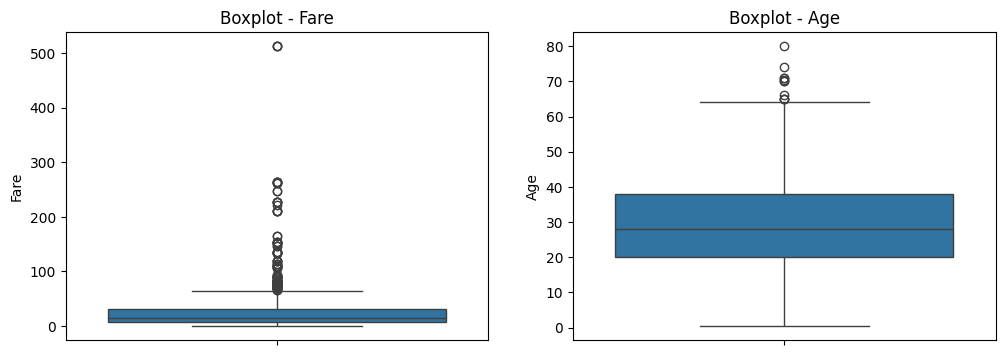

In [31]:
# Fare & Age visualization

# Distribution before treatment 
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(df['Fare'], ax=axs[0])
axs[0].set_title("Boxplot - Fare")
sns.boxplot(df['Age'], ax=axs[1])
axs[1].set_title("Boxplot - Age")
plt.show()


In [32]:
# Méthode A : IQR (Interquartile Range)


def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Outliers détectés par IQR
outliers_fare = detect_outliers_iqr(df, 'Fare')
outliers_age = detect_outliers_iqr(df, 'Age')

print("Outliers détectés - Fare :", len(outliers_fare))
print("Outliers détectés - Age :", len(outliers_age))

Outliers détectés - Fare : 116
Outliers détectés - Age : 11


In [33]:
# Méthode B : Z-score


def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column].dropna()))
    return data[column][z_scores > threshold]

z_outliers_fare = detect_outliers_zscore(df, 'Fare')
z_outliers_age = detect_outliers_zscore(df, 'Age')

print("Z-score outliers - Fare :", len(z_outliers_fare))
print("Z-score outliers - Age :", len(z_outliers_age))

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
# Reindexing:

# .dropna(), qui modifie l'indexation, donc le masque z_scores > threshold ne correspond plus à l'index d'origine du DataFrame.


def detect_outliers_zscore(data, column, threshold=3):
    col_no_na = data[column].dropna()
    z_scores = np.abs(stats.zscore(col_no_na))
    return data.loc[col_no_na.index][z_scores > threshold]

In [37]:

from scipy import stats
import numpy as np

def detect_outliers_zscore(data, column, threshold=3):
    col_no_na = data[column].dropna()
    z_scores = np.abs(stats.zscore(col_no_na))
    outlier_mask = z_scores > threshold
    return data.loc[col_no_na.index][outlier_mask]

z_outliers_age = detect_outliers_zscore(df, 'Age')
print("Number of outliers in Age :", len(z_outliers_age))

Number of outliers in Age : 2


In [ ]:
# Étape 4 – Traitement des outliers v1 - IQR removal


def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df_cleaned = df.copy()
df_cleaned = remove_outliers_iqr(df_cleaned, 'Fare')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Age')

print("Iinitiale size:", df.shape[0])
print("After removal of outliers:", df_cleaned.shape[0])

Iinitiale size: 891
After removal of outliers: 601


In [41]:
# Étape 4 – Traitement des outliers v2 - capping

def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower, lower,
                            np.where(data[column] > upper, upper, data[column]))
    return data

df_capped = df.copy()
df_capped = cap_outliers(df_capped, 'Fare')
df_capped = cap_outliers(df_capped, 'Age')


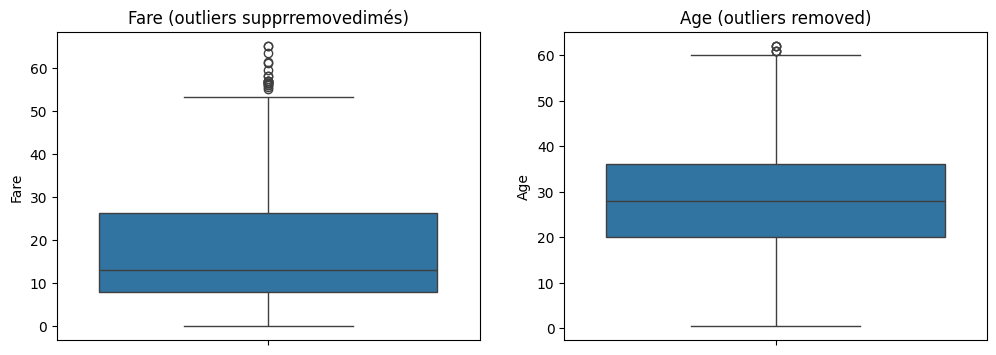

In [ ]:
# Étape 5 – Visualisation after treatment

# Visualisation après suppression ou capping

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(df_cleaned['Fare'], ax=axs[0])
axs[0].set_title("Fare (outliers supprremovedimés)")
sns.boxplot(df_cleaned['Age'], ax=axs[1])
axs[1].set_title("Age (outliers removed)")
plt.show()

=== Conclusion ==


“Decide on a strategy to handle the identified outliers...”

* outliers identified >> data contextualisation
    Fare variable : some exceptionally high values  >> issue

        ° Either removal of those data because of rarety or non importance for the job.
        ° Or cap these data to a max level what was THE choice retained



“Implement the chosen strategy and assess its impact on the dataset.”

* Capping implémentation by replacing the values superior to 95ᵉ percentile by the  threshold value.

* Assessment: 

    Descriptives statistics compared before and after (mean, max, standard deviation).
    Visualisation of the distributions with boxplots or histograms.


🌟 Exercise 5: Data Standardization and Normalization

In [43]:
# Étape 1: Librairies import

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Étape 2 : Data uplod via 'df'  (train.csv already loaded)
df = pd.read_csv('train.csv') 

In [44]:
# Étape 3: Columns identified to be transformed

# Sélection of relevant columns
numerical_cols = ['Age', 'Fare']

#  Descriptive statistics before transformation
print(df[numerical_cols].describe())

              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


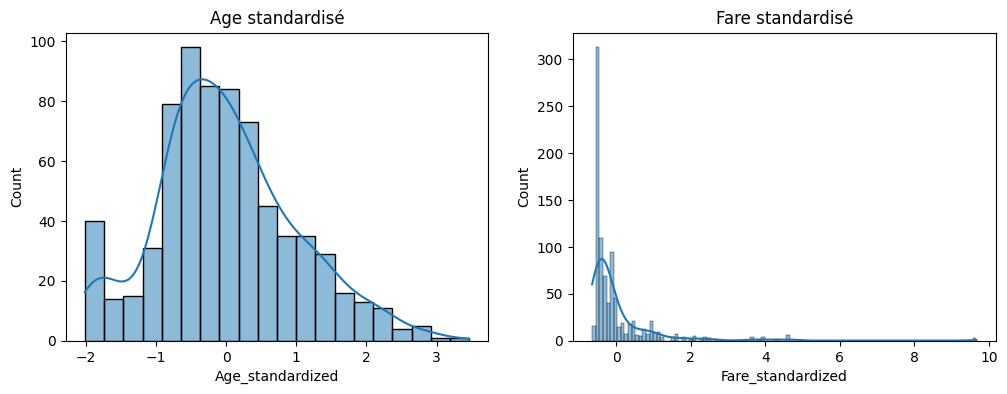

In [45]:
# Étape 4 : Standardisation with StandardScaler

# Standardisation
scaler_standard = StandardScaler()
df[['Age_standardized', 'Fare_standardized']] = scaler_standard.fit_transform(df[numerical_cols])

#  Visual verification
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Age_standardized'], kde=True, ax=axs[0])
axs[0].set_title('Age standardisé')
sns.histplot(df['Fare_standardized'], kde=True, ax=axs[1])
axs[1].set_title('Fare standardisé')
plt.show()

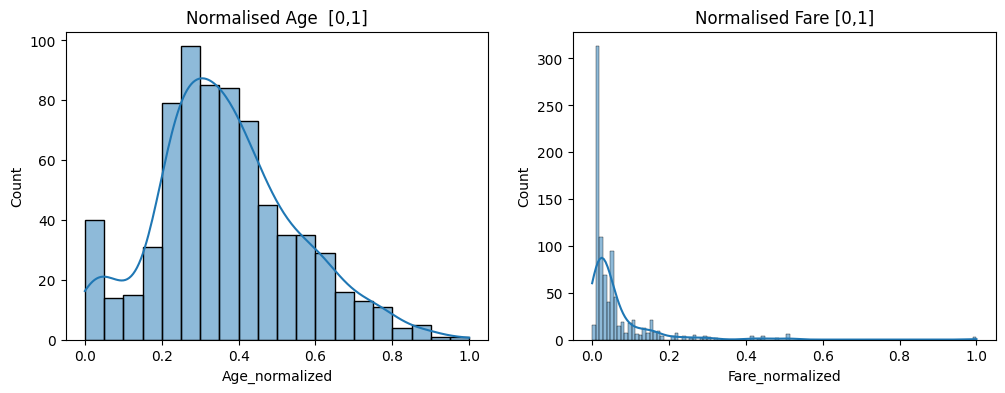

In [48]:
# Étape 5 : Normalisation (Min-Max Scaling)

# Normalisation
scaler_minmax = MinMaxScaler()
df[['Age_normalized', 'Fare_normalized']] = scaler_minmax.fit_transform(df[numerical_cols])

#  Visual verification
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Age_normalized'], kde=True, ax=axs[0])
axs[0].set_title('Normalised Age  [0,1]')
sns.histplot(df['Fare_normalized'], kde=True, ax=axs[1])
axs[1].set_title('Normalised Fare [0,1]')
plt.show()

In [49]:
print(df[['Age', 'Age_standardized', 'Age_normalized']].head())
print(df[['Fare', 'Fare_standardized', 'Fare_normalized']].head())

    Age  Age_standardized  Age_normalized
0  22.0         -0.530377        0.271174
1  38.0          0.571831        0.472229
2  26.0         -0.254825        0.321438
3  35.0          0.365167        0.434531
4  35.0          0.365167        0.434531
      Fare  Fare_standardized  Fare_normalized
0   7.2500          -0.502445         0.014151
1  71.2833           0.786845         0.139136
2   7.9250          -0.488854         0.015469
3  53.1000           0.420730         0.103644
4   8.0500          -0.486337         0.015713


🌟 Exercise 6: Feature Encoding

In [50]:
# Étape 1 : Upload / Categorical Columns

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Dataset upload
df = pd.read_csv("train.csv")

# Datatypes display
print(df.dtypes)

# Categorical Columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Colonnes catégorielles :", list(categorical_cols))

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Colonnes catégorielles : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [51]:
# Étape 2 : One-Hot Encoding 

# One-hot encoding for 'Sex' and 'Embarked'
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# New columns display
print(df_encoded.filter(like='Sex_').columns)
print(df_encoded.filter(like='Embarked_').columns)

Index(['Sex_male'], dtype='object')
Index(['Embarked_Q', 'Embarked_S'], dtype='object')


In [ ]:
# Étape 3 : Label Encoding (ordinal variable)


df['CabinClass'] = df['Cabin'].astype(str).str[0] 

# Supposons que tu as une colonne ordinale comme 'CabinClass'
label_encoder = LabelEncoder()
df['CabinClass_Encoded'] = label_encoder.fit_transform(df['CabinClass'])

# Afficher les correspondances
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2), 'D': np.int64(3), 'E': np.int64(4), 'F': np.int64(5), 'G': np.int64(6), 'T': np.int64(7), 'n': np.int64(8)}


In [ ]:
# Étape 4 : Encoded columns integration

print(df_encoded.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN      True       False        True  
1          PC 17599  71.2833   C85     False       False       False  
2  STON/O2. 3101282   7.9250   NaN     False       False        True  
3            113803  53.1000  C123     Fal

🌟 Exercise 7: Data Transformation for Age Feature

In [54]:
import pandas as pd

# Dataset upload
df = pd.read_csv("train.csv")

In [56]:
# Étape 1 : Age groups creation with pd.cut()

# Age slots definition
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teenager', 'YoungAdult', 'Adult', 'Senior']

# Column 'Age'
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# First values verification
print(df[['Age', 'AgeGroup']].head(10))

    Age    AgeGroup
0  22.0  YoungAdult
1  38.0       Adult
2  26.0  YoungAdult
3  35.0  YoungAdult
4  35.0  YoungAdult
5   NaN         NaN
6  54.0       Adult
7   2.0       Child
8  27.0  YoungAdult
9  14.0    Teenager


In [57]:
# Étape 2 : get_dummies() for One-Hot Encoding

# One-hot encoding of the new categorical column  AgeGroup
agegroup_dummies = pd.get_dummies(df['AgeGroup'], prefix='AgeGroup')

# Encoding columns merging to core DataFrame
df = pd.concat([df, agegroup_dummies], axis=1)

# Result checking
print(df[['Age', 'AgeGroup'] + list(agegroup_dummies.columns)].head(10))

    Age    AgeGroup  AgeGroup_Child  AgeGroup_Teenager  AgeGroup_YoungAdult  \
0  22.0  YoungAdult           False              False                 True   
1  38.0       Adult           False              False                False   
2  26.0  YoungAdult           False              False                 True   
3  35.0  YoungAdult           False              False                 True   
4  35.0  YoungAdult           False              False                 True   
5   NaN         NaN           False              False                False   
6  54.0       Adult           False              False                False   
7   2.0       Child            True              False                False   
8  27.0  YoungAdult           False              False                 True   
9  14.0    Teenager           False               True                False   

   AgeGroup_Adult  AgeGroup_Senior  
0           False            False  
1            True            False  
2           False  